In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.6)

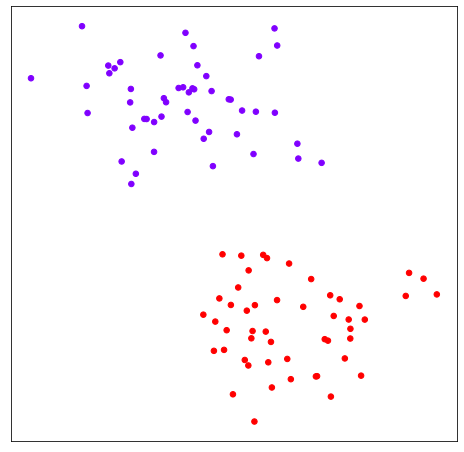

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap='rainbow')
plt.xticks([])
plt.yticks([])
ax = plt.gca()

In [5]:
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [6]:
axis_x = np.linspace(xlim[0],xlim[1],30)
axis_y = np.linspace(ylim[0],ylim[1],30)

In [7]:
axis_x, axis_y = np.meshgrid(axis_x, axis_y)

In [8]:
axis_x.shape

(30, 30)

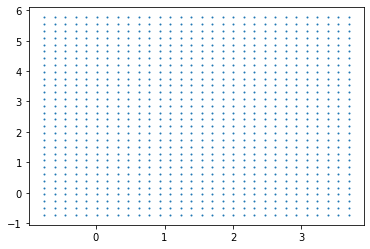

In [9]:
plt.scatter(axis_x, axis_y
           ,s=1)

In [10]:
svc = SVC(kernel='linear').fit(X,y)

In [11]:
xy = np.vstack([axis_x.ravel(), axis_y.ravel()]).T

In [12]:
xy.shape

(900, 2)

In [13]:
xy

array([[-0.75755772, -0.73190977],
       [-0.60429062, -0.73190977],
       [-0.45102351, -0.73190977],
       ...,
       [ 3.38065409,  5.7697841 ],
       [ 3.53392119,  5.7697841 ],
       [ 3.6871883 ,  5.7697841 ]])

In [29]:
def svc_plot(svc,ax=None):    #绘制决策边界图函数
    if ax == None:
        ax = plt.gca()
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    axis_x = np.linspace(xlim[0],xlim[1],30)
    axis_y = np.linspace(ylim[0],ylim[1],30)

    axis_x, axis_y = np.meshgrid(axis_x, axis_y)
    xy = np.vstack([axis_x.ravel(), axis_y.ravel()]).T
    
    Z = svc.decision_function(xy).reshape(axis_x.shape)

    ax.contour(axis_x, axis_y, Z
              ,colors='k'
              ,levels=[-1,0,1]
              ,alpha=0.5
              ,linestyles=['--','-','--']
              )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [15]:
svc.support_vectors_[0]

array([0.44359863, 3.11530945])

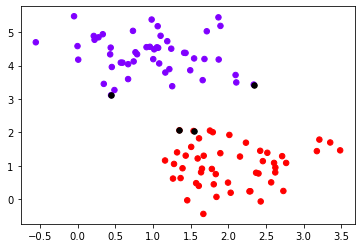

In [16]:
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap='rainbow')
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1],c='k',s=30)

In [17]:
svc.n_support_

array([2, 2])

In [18]:
from sklearn.datasets import make_circles

In [19]:
X, y = make_circles(n_samples=100
                   ,factor=0.2
                   ,noise=0.1
                   )

In [20]:
X.shape

(100, 2)

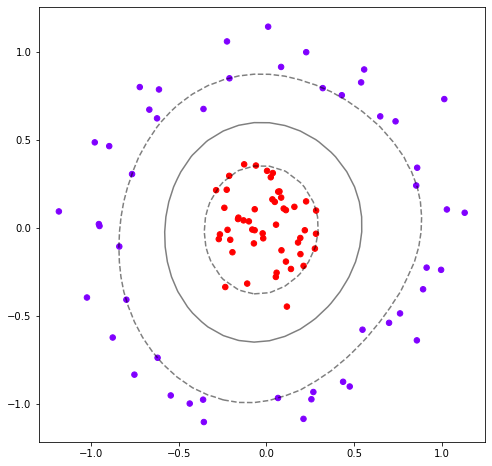

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1]
           ,c=y
           ,s=30
           ,cmap='rainbow'
           )
svc = SVC(kernel='rbf').fit(X, y)
svc_plot(svc)

In [22]:
r = np.exp(-(X**2).sum(1))

In [23]:
rlim = np.linspace(min(r),max(r),100)

In [24]:
rlim

array([0.20932005, 0.21729116, 0.22526226, 0.23323336, 0.24120446,
       0.24917557, 0.25714667, 0.26511777, 0.27308887, 0.28105998,
       0.28903108, 0.29700218, 0.30497329, 0.31294439, 0.32091549,
       0.32888659, 0.3368577 , 0.3448288 , 0.3527999 , 0.360771  ,
       0.36874211, 0.37671321, 0.38468431, 0.39265541, 0.40062652,
       0.40859762, 0.41656872, 0.42453982, 0.43251093, 0.44048203,
       0.44845313, 0.45642423, 0.46439534, 0.47236644, 0.48033754,
       0.48830865, 0.49627975, 0.50425085, 0.51222195, 0.52019306,
       0.52816416, 0.53613526, 0.54410636, 0.55207747, 0.56004857,
       0.56801967, 0.57599077, 0.58396188, 0.59193298, 0.59990408,
       0.60787518, 0.61584629, 0.62381739, 0.63178849, 0.6397596 ,
       0.6477307 , 0.6557018 , 0.6636729 , 0.67164401, 0.67961511,
       0.68758621, 0.69555731, 0.70352842, 0.71149952, 0.71947062,
       0.72744172, 0.73541283, 0.74338393, 0.75135503, 0.75932613,
       0.76729724, 0.77526834, 0.78323944, 0.79121055, 0.79918

In [25]:
from mpl_toolkits import mplot3d

In [26]:
def plot_3D(X,y,r,elev=30,azim=30):  #绘制3D图
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

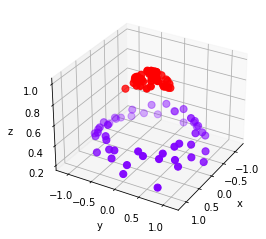

In [27]:
plot_3D(X,y,r)